In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Loading the data set

In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


# Describing the data set

### Number of data in each column

In [4]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

 Hence there are **string** , **integer** and **float** data types in the data set

In [5]:
df.count() 

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

Looking at the number of data in each column we can intuitively we can say that there are missing data in Columns **Description** and **CustomerID**

### Looking for null data more evidently

In [6]:
df.isnull().any(axis = 0)

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

Hence our intution was correct there is missing data in columns **Description** and **CustomerID**

# Data Preprocessing

Data Preprocessing is required for removing **null data** , **dummy data** and also for **dropping irrelevent columns**

### Dropping irrelevent columns

In [7]:
df2 = df.drop(['Description','CustomerID'],axis = 1)

### Looking for dummy records 

In [8]:
df_duplicate_rows = df2[df2.duplicated()]

In [9]:
df_duplicate_rows.shape

(5270, 6)

So there are in total **5270** duplicate records

#### Now let us drop the duplicate records

In [10]:
df2 = df2.drop_duplicates()
df2.head(5)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,United Kingdom


In [11]:
df2.count()

InvoiceNo      536639
StockCode      536639
Quantity       536639
InvoiceDate    536639
UnitPrice      536639
Country        536639
dtype: int64

After dropping the dummy data and irrelevent columns we are sucessfully able to remove all null data as well , as we can see it clearly based on the count of each columns

In [12]:
df2.isnull().any(axis = 0)

InvoiceNo      False
StockCode      False
Quantity       False
InvoiceDate    False
UnitPrice      False
Country        False
dtype: bool

The above out put is the evidence that we have sucessfully removed all null values

# Analsis of the data set

### Portions of customers in different countries

In [13]:
countries = set(np.array(df2['Country']))
df2['Country'].value_counts()


United Kingdom          490298
Germany                   9480
France                    8541
EIRE                      8184
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1994
Portugal                  1510
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Unspecified                442
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     294
USA                        291
Hong Kong                  284
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

**So we can say that maximum transactions are from United Kingdom so far.**

### Yearly sales

In [14]:
d = df['InvoiceDate'].dt.year 
years = list(set(d))
sales = []
label = []
for i in years :
    sales.append(d.value_counts()[i])
    label.append('Years = ' +str(i)+' , Sales_count = '+str(d.value_counts()[i]))

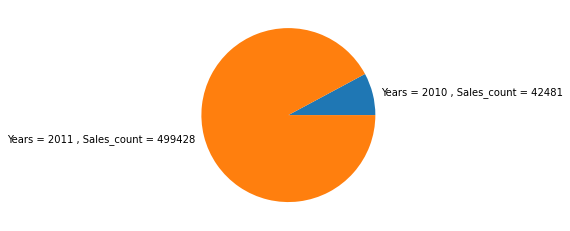

In [15]:
plt.pie(sales, labels = label)
plt.show() 

In [16]:
y_2011 = (499428/(499428+42481))
y_2010 = (1-y_2011)*100
y_2011 = y_2011*100
print(y_2011 , y_2010)


92.16086095635984 7.839139043640165


**So we can conclude that around 92% of the sales happend in the year of 2011 and remaining 8% in the year of 2010**

### Monthly sales in the year of 2011

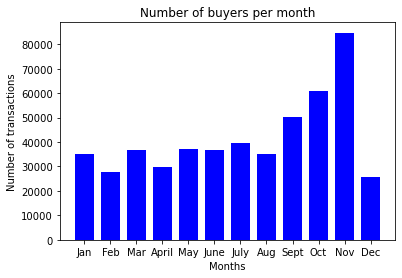

In [19]:
d = df[df["InvoiceDate"].dt.year == 2011]
transactions = []
d_months = d['InvoiceDate'].dt.month
months = ['Jan','Feb','Mar','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
for i in range(1,13) :
    transactions.append(d_months.value_counts()[i])
plt.bar(months,transactions,color='blue',width=0.7)
plt.xlabel("Months")
plt.ylabel("Number of transactions")
plt.title('Number of buyers per month')
plt.show()

 
   
    

In [20]:
df['Amount'] = np.array(df['Quantity'])*np.array(df['UnitPrice'])

In [21]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


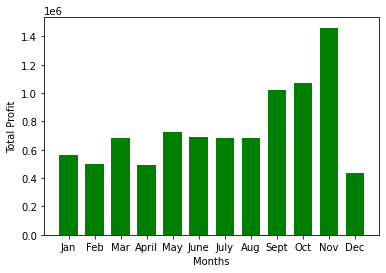

In [69]:
d = df[df["InvoiceDate"].dt.year == 2011]
d = d.drop(['InvoiceNo','StockCode','Description','Quantity','UnitPrice','CustomerID','Country'],axis = 1)
d['Months'] = np.array(d['InvoiceDate'].dt.month)
d = d.drop(['InvoiceDate'],axis = 1)
sales = d.groupby(['Months']).sum()
s = np.array(sales['Amount'])
months = ['Jan','Feb','Mar','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
plt.bar(months,s,color='green',width=0.7)
plt.xlabel("Months")
plt.ylabel("Total Profit")
plt.show()
    

**So we can see that maximum profit is earned in the month of November**

# Most selling products

### Top selling product in the years of 2010 and 2011

In [87]:
a = df.groupby(['StockCode']).sum()
a.head(10)

,Quantity,UnitPrice,CustomerID,Amount
StockCode,,,,
10002,1037,77.15,723842.0,759.89
10080,495,9.04,333014.0,119.09
10120,193,6.30,484879.0,40.53
10125,1296,80.81,976545.0,994.84
10133,2775,129.16,1942666.0,1540.02
10134,-19,0.00,0.0,0.00
10135,2230,253.83,1854058.0,2206.14
11001,1430,225.38,1044130.0,2152.39
15030,293,3.77,208128.0,41.47


In [88]:
a.sort_values(by=['Quantity'],ascending=False).head(10)

,Quantity,UnitPrice,CustomerID,Amount
StockCode,,,,
22197,56450,1527.11,17275441.0,50987.47
84077,53847,173.39,7297844.0,13587.93
85099B,47363,5333.30,25396253.0,92356.03
85123A,38830,7177.79,32318742.0,97894.50
84879,36221,2584.77,21602517.0,58959.73
21212,36039,1047.04,16309247.0,21059.72
23084,30646,2496.53,12795186.0,66756.59
22492,26437,304.81,4919126.0,16810.42
22616,26315,236.87,6256466.0,7972.76


 **Here is the top 10 selling produncts based on there quantity**

In [89]:
a.sort_values(by=['Amount'],ascending=False).head(10)

,Quantity,UnitPrice,CustomerID,Amount
StockCode,,,,
DOT,1707,206252.06,225536.0,206245.48
22423,12980,30360.61,28473438.0,164762.19
47566,18022,9979.62,21766527.0,98302.98
85123A,38830,7177.79,32318742.0,97894.50
85099B,47363,5333.30,25396253.0,92356.03
23084,30646,2496.53,12795186.0,66756.59
POST,6353,46388.47,15425584.0,66230.64
22086,18902,4054.90,15914479.0,63791.94
84879,36221,2584.77,21602517.0,58959.73


**Here is the top 10 products with max profits**